# Task 3: Customer Churn Prediction
    Develop a model to predict customer churn for a subscriptionbased service or business. Use historical customer data, including features like usage behavior and customer demographics, and try algorithms like Logistic Regression, Random Forests, or Gradient Boosting to predict churn.

In [2]:
## Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [3]:
## Read The Data 

data = pd.read_csv("./Customer Churn Dataset/Churn_Modelling.csv")

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
## Check for basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
## Check basic statistic
data.describe(include = "all")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


# Data Cleaning

In [7]:
## Check for missing values or nan values

data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
## Check for any duplicates rows

data.duplicated().sum()

0

In [9]:
## Remove unnecessary rows

data.drop(["RowNumber","CustomerId"],axis = 1, inplace = True)
data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# Check for Data Imbalance

data["Exited"].value_counts() ## There is imbalance data

0    7963
1    2037
Name: Exited, dtype: int64

# Data Visualization 

<Axes: xlabel='Exited', ylabel='count'>

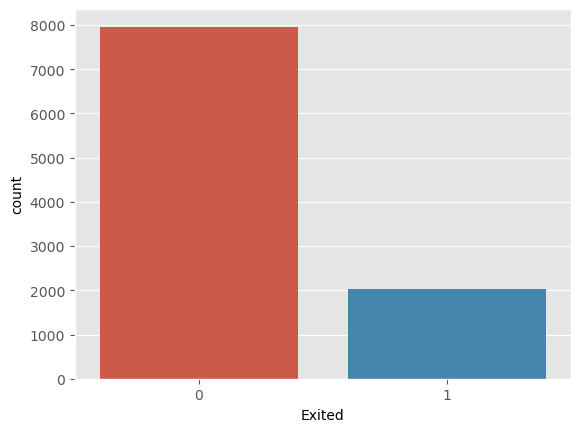

In [11]:
## View the Label data for imbalance data
plt.style.use("ggplot")
sns.countplot(x = data["Exited"])

<Axes: xlabel='Gender', ylabel='count'>

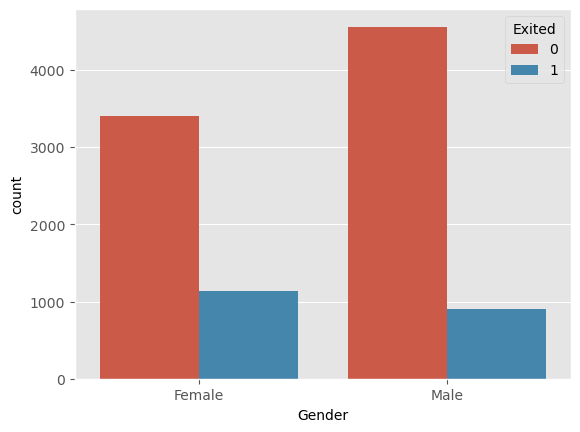

In [12]:
## View the GEnder
plt.style.use("ggplot")
sns.countplot(x = data["Gender"],hue = "Exited" ,data = data)

<Axes: xlabel='Geography', ylabel='Count'>

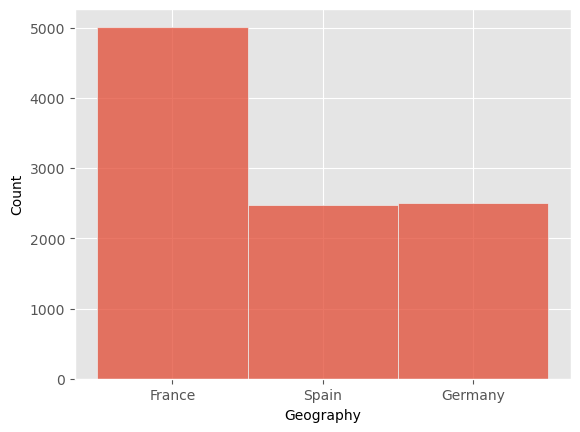

In [13]:
## Plot the geography of data 
sns.histplot(x ="Geography" ,data =data)

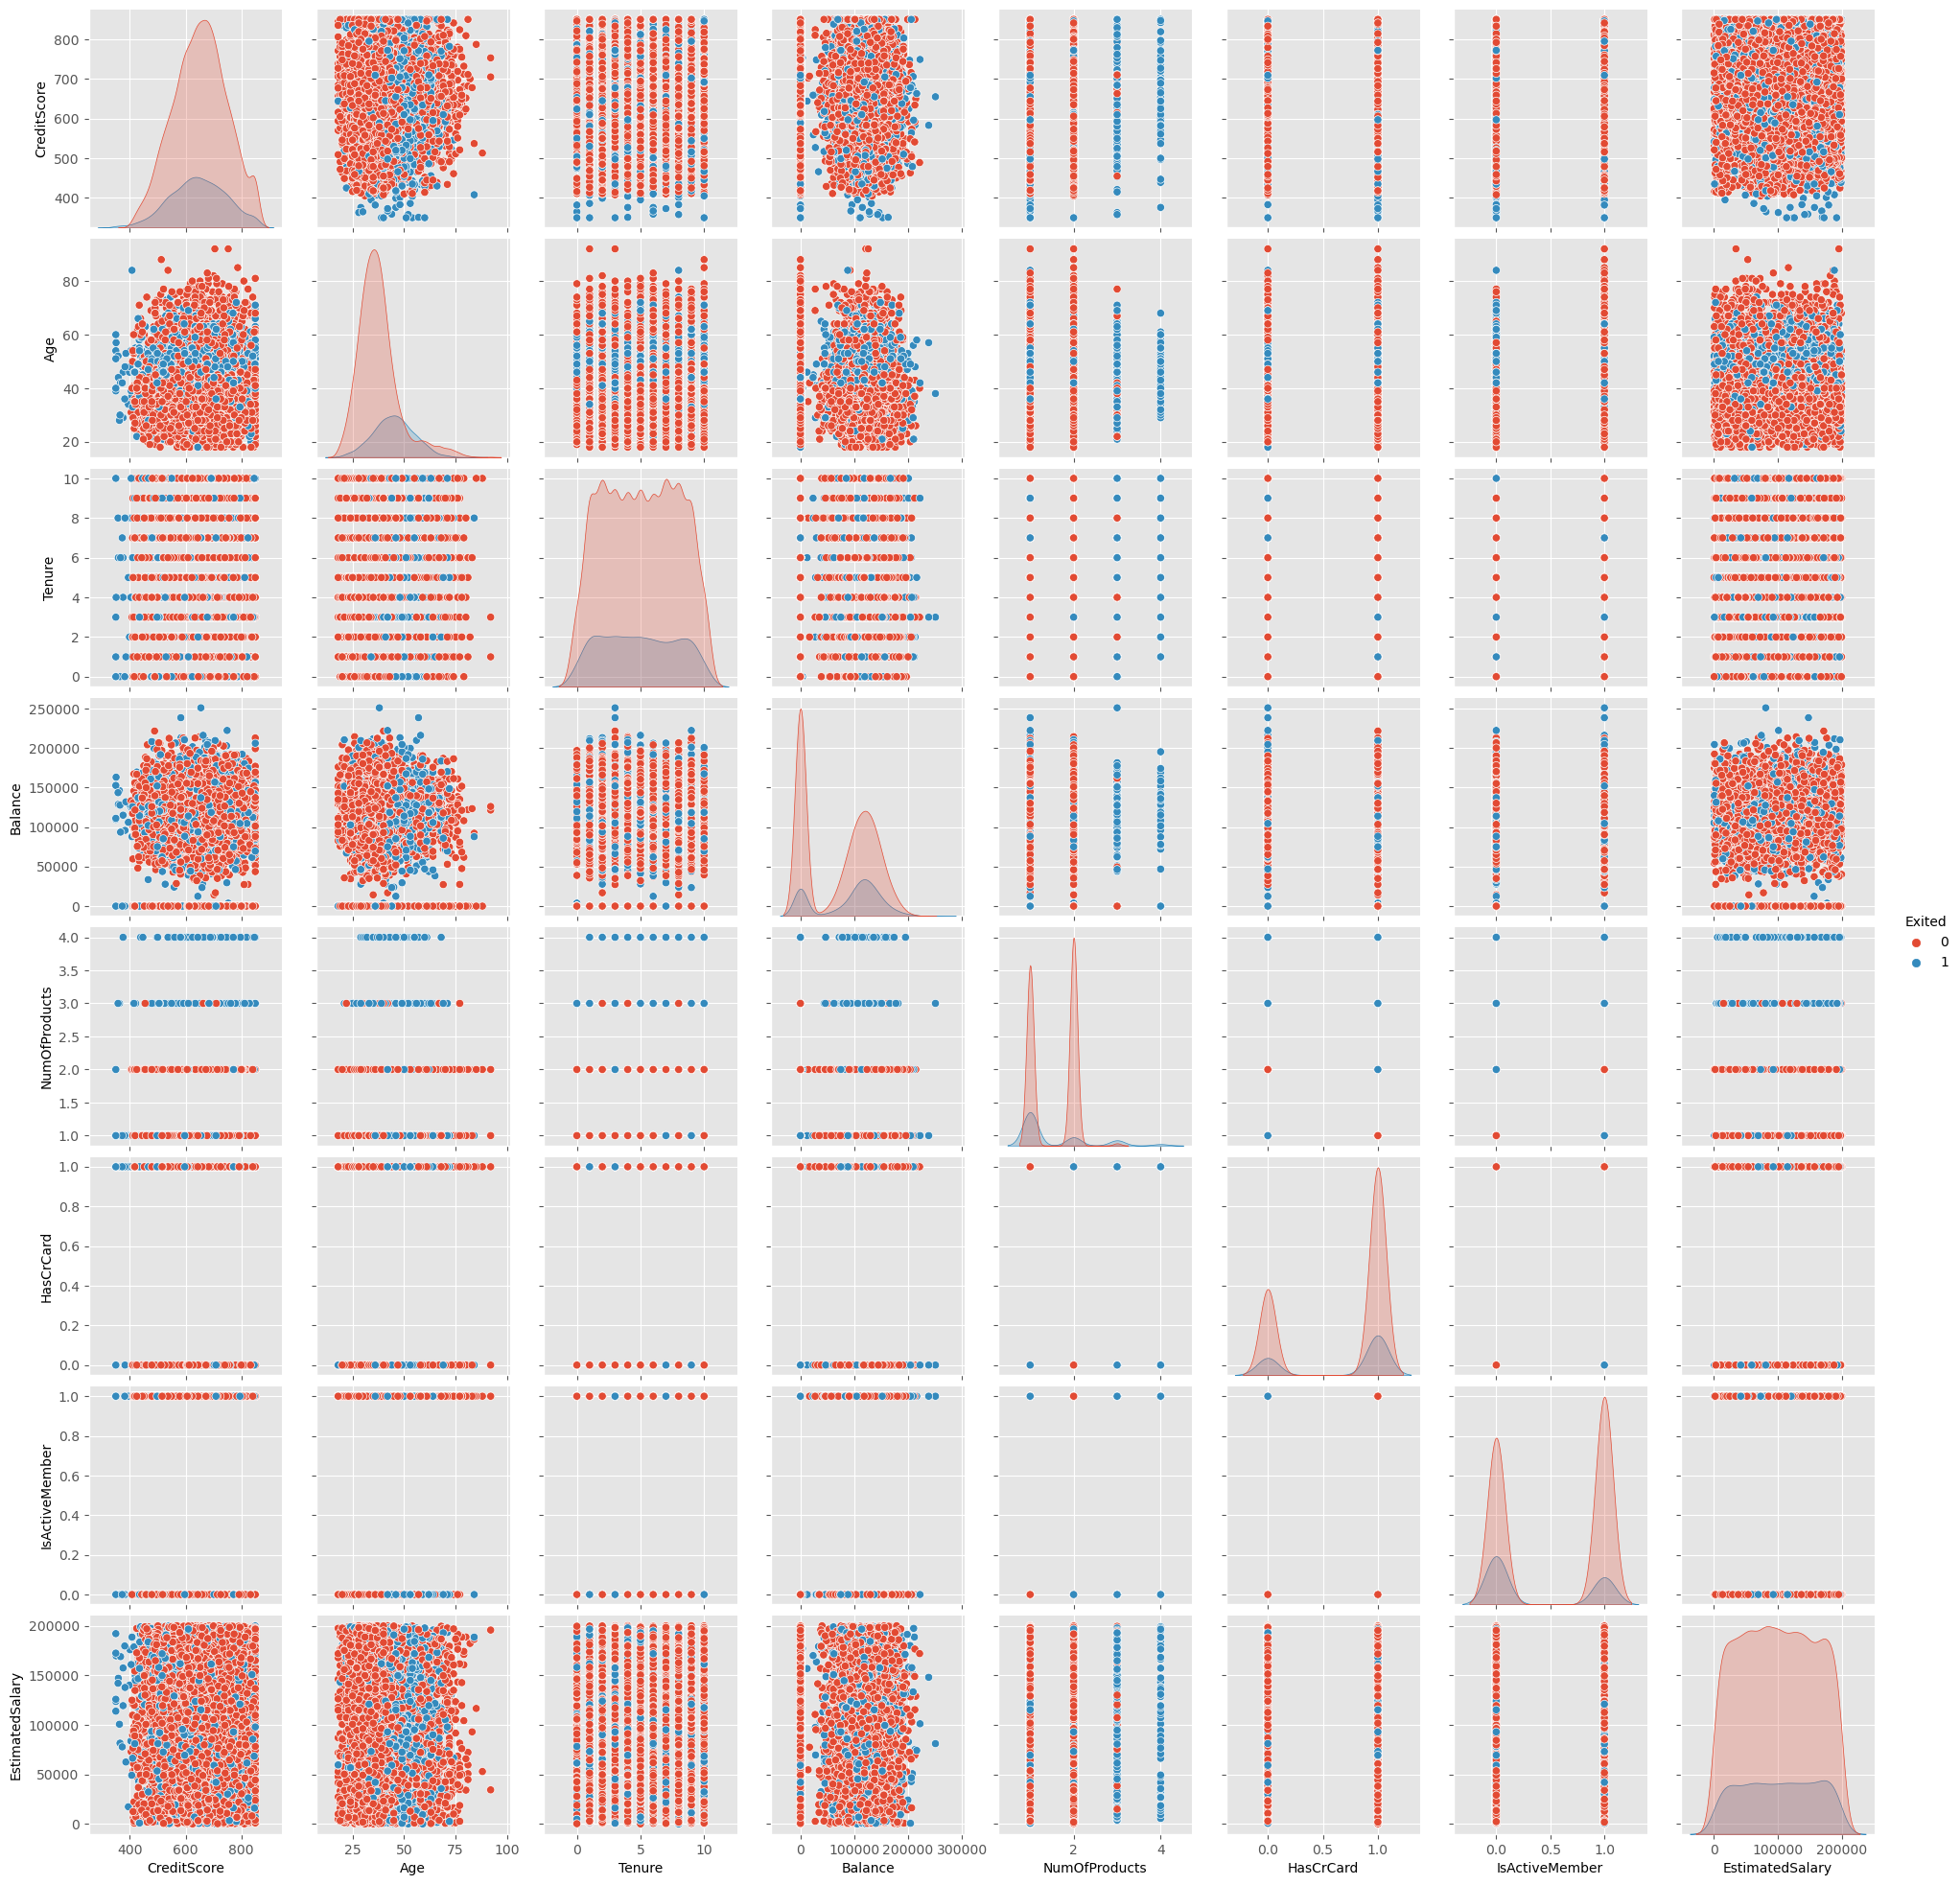

In [14]:
## Pair plot basic understanding
sns.pairplot(data ,hue = "Exited")

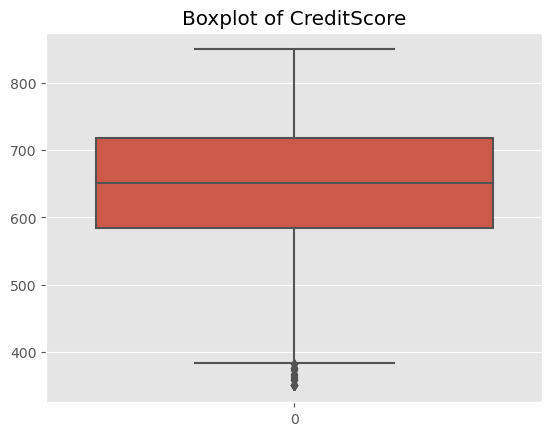

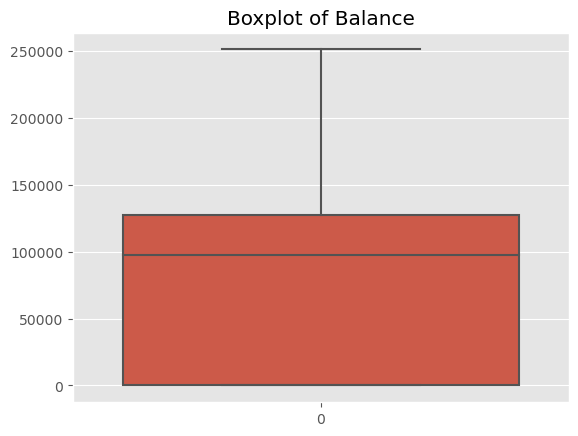

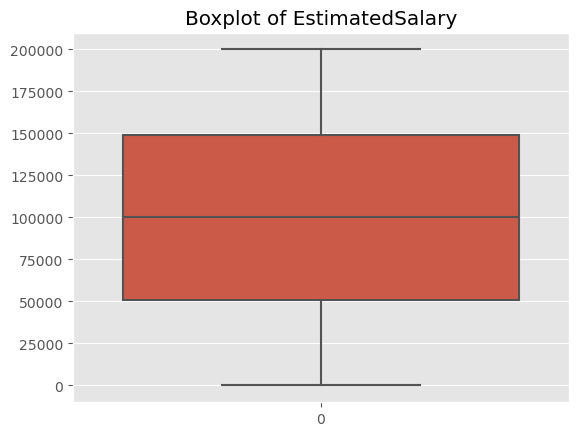

In [15]:
## check for outliers in numerical data using box plot

for i in ["CreditScore","Balance","EstimatedSalary"]:
    sns.boxplot(data[i])
    plt.title(f"Boxplot of {i}")
    plt.show()
    


In [16]:
data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Preprocessing

## With Imbalance data

In [17]:
## Import necessary libraries for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder , StandardScaler 
from sklearn.compose import ColumnTransformer 

encoder = OneHotEncoder()
scaler = StandardScaler()

categ = ["Surname","Geography","Gender","NumOfProducts","HasCrCard","IsActiveMember"]
numeric = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

transf = ColumnTransformer([("cat",encoder,categ),
                              ("num",scaler, numeric)])
x = data.drop("Exited" ,axis = 1)
y = data["Exited"]

transformX = transf.fit_transform(x)

print("transformX shape :",transformX.shape)
print("y shape :",y.shape)

transformX shape : (10000, 2950)
y shape : (10000,)


In [18]:
## Split the data to train test

x_train ,x_test ,y_train ,y_test = train_test_split (transformX ,y ,test_size = 0.2 ,random_state = 42)

# Model Selection

In [19]:
## Import neceesary model for evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier

from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix ,precision_score ,recall_score

In [20]:
## Create a function to test models
def model_train_testing(model):
    model.fit(x_train,y_train)
    y_preds= model.predict(x_test)

    print("\nAccuracy Score : " ,accuracy_score(y_test ,y_preds))
    print("\nPrecision Score : " ,precision_score(y_test ,y_preds))
    print("\nRecall Score : " ,recall_score(y_test ,y_preds))
    print("\nConfusion Matrix : \n" ,confusion_matrix(y_test ,y_preds))
    print("\nClassification_report  :\n " ,classification_report(y_test ,y_preds))

In [21]:
print(10* "-", "LogisticRegression " ,10* "-")

## LogisticRegression with imbalance data
lr = LogisticRegression()
model_train_testing(lr)

print(30* "-", "RandomForestClassifier " ,30* "-")

## RandomForestClassifier with imbalance data
rf = RandomForestClassifier()
model_train_testing(rf)


print(30* "-", "  GradientBoostingClassifier " ,30* "-")
## GradientBoostingClassifier without dealing with imbalance data
gc = GradientBoostingClassifier()
model_train_testing(gc)

---------- LogisticRegression  ----------


C:\Users\Barcha\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Accuracy Score :  0.8455

Precision Score :  0.6944444444444444

Recall Score :  0.3816793893129771

Confusion Matrix : 
 [[1541   66]
 [ 243  150]]

Classification_report  :
                precision    recall  f1-score   support

           0       0.86      0.96      0.91      1607
           1       0.69      0.38      0.49       393

    accuracy                           0.85      2000
   macro avg       0.78      0.67      0.70      2000
weighted avg       0.83      0.85      0.83      2000

------------------------------ RandomForestClassifier  ------------------------------

Accuracy Score :  0.868

Precision Score :  0.8208955223880597

Recall Score :  0.4198473282442748

Confusion Matrix : 
 [[1571   36]
 [ 228  165]]

Classification_report  :
                precision    recall  f1-score   support

           0       0.87      0.98      0.92      1607
           1       0.82      0.42      0.56       393

    accuracy                           0.87      2000
   macro avg  

## Without Imbalance Data using OverSampling

In [22]:
## Import necessary libraries for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder , StandardScaler 
from sklearn.compose import ColumnTransformer 
from imblearn.over_sampling import SMOTE

encoder = OneHotEncoder()
scaler = StandardScaler()

categ = ["Surname","Geography","Gender","NumOfProducts","HasCrCard","IsActiveMember"]
numeric = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

transf = ColumnTransformer([("cat",encoder,categ),
                              ("num",scaler, numeric)])


x = data.drop("Exited" ,axis = 1)
y = data["Exited"]

## tranform data
transformX = transf.fit_transform(x )


## Oversampling
sampler= SMOTE()
x_sampled ,y_sampled = sampler.fit_resample(transformX ,y)



print("x_sampled shape :",x_sampled.shape)
print("y_sampled shape :",y_sampled.shape)


## Split the data to train test

x_train ,x_test ,y_train ,y_test = train_test_split (x_sampled ,y_sampled ,test_size = 0.2 ,random_state = 42)

x_sampled shape : (15926, 2950)
y_sampled shape : (15926,)


In [23]:
## Train and test 

print(10* "-", "LogisticRegression " ,10* "-")

## LogisticRegression with imbalance data
lr = LogisticRegression()
model_train_testing(lr)

print(30* "-", "RandomForestClassifier " ,30* "-")

## RandomForestClassifier with imbalance data
rf = RandomForestClassifier()
model_train_testing(rf)


print(30* "-", "  GradientBoostingClassifier " ,30* "-")
## GradientBoostingClassifier without dealing with imbalance data
gc = GradientBoostingClassifier()
model_train_testing(gc)

---------- LogisticRegression  ----------


C:\Users\Barcha\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Accuracy Score :  0.812617702448211

Precision Score :  0.7914634146341464

Recall Score :  0.8358016741790084

Confusion Matrix : 
 [[1291  342]
 [ 255 1298]]

Classification_report  :
                precision    recall  f1-score   support

           0       0.84      0.79      0.81      1633
           1       0.79      0.84      0.81      1553

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186

------------------------------ RandomForestClassifier  ------------------------------

Accuracy Score :  0.9422473320778405

Precision Score :  0.9459283387622149

Recall Score :  0.9349645846748229

Confusion Matrix : 
 [[1550   83]
 [ 101 1452]]

Classification_report  :
                precision    recall  f1-score   support

           0       0.94      0.95      0.94      1633
           1       0.95      0.93      0.94      1553

    accuracy                           0.94 

# Thank you😊